# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

[nltk_data] Downloading package punkt to C:\Users\Khojasteh
[nltk_data]     Mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Khojasteh
[nltk_data]     Mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Mount Drive Folder if using colab

In [3]:
folder_path = 'final'

# List comprehension to find all CSV files
csv_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

csv_paths = np.array(csv_paths)

# At the moment, only 13 csv files (one from each category) are being processed as proof of concept. 
At max 30 can be processed out of the total 51 because of Colab's RAM constraints.
If all processing is done together, the runtime crashes because RAM usage exceedes 12GBs

In [38]:
csv_paths = csv_paths[:30] 

In [4]:
csv_paths

array(['final\\addiction_2018_features_tfidf_256.csv',
       'final\\adhd_2018_features_tfidf_256.csv',
       'final\\alcoholism_2018_features_tfidf_256.csv',
       'final\\anxiety_2018_features_tfidf_256.csv',
       'final\\autism_2018_features_tfidf_256.csv',
       'final\\bipolarreddit_2018_features_tfidf_256.csv',
       'final\\bpd_2018_features_tfidf_256.csv',
       'final\\depression_2018_features_tfidf_256.csv',
       'final\\EDAnonymous_2019_features_tfidf_256.csv',
       'final\\healthanxiety_2018_features_tfidf_256.csv',
       'final\\ptsd_2018_features_tfidf_256.csv',
       'final\\schizophrenia_2018_features_tfidf_256.csv',
       'final\\socialanxiety_2018_features_tfidf_256.csv'], dtype='<U47')

# Cleaning Functions + TF-IDF

In [5]:
 # make everthing lowercase
make_small = lambda x: x.str.lower()

# remove URLs
def no_url(text, replacement_text = ''):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  urls = url_pattern.findall(text)
  return url_pattern.sub(replacement_text, text)

# remove symbols
def no_symbols(text, replacement_text = ''):
    # Combined pattern to include symbols and text artifacts like HTML entities
    combined_pattern = re.compile(
        r'[,.!''|`~?@#\$%\^&\*\(\)\+=]|'
        r'&amp;|&lt;|&gt;|&nbsp;|\u200b|'
        r'&quot;|&apos;|&cent;|&pound;|&yen;|&euro;|&copy;|&reg;'
    )
    # Apply the combined pattern
    return combined_pattern.sub(replacement_text, text)

# tokenize words
def tokenize_posts(text):
  return word_tokenize(text)

# remove stop words
def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english'))
  tokens_without_sw = [word for word in tokens if not word in stop_words]
  return tokens_without_sw


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Khojasteh Mirza\AppData\Local\Temp\ipykernel_17568\2814178810.py:14: SyntaxWarning: invalid escape sequence '\$'
  r'[,.!''|`~?@#\$%\^&\*\(\)\+=]|'


# TF-IDF + Sentiment Analysis + POS Tagging + NMF Topic Modelling = concat and put into some model

In [6]:
import os
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk import FreqDist
from scipy.sparse import hstack
from sklearn.base import BaseEstimator, TransformerMixin

# Ensure you have the necessary NLTK downloads
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to C:\Users\Khojasteh
[nltk_data]     Mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Khojasteh
[nltk_data]     Mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Khojasteh Mirza\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
 # make everthing lowercase
make_small = lambda x: x.str.lower()

# remove URLs
def no_url(text, replacement_text = ''):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  urls = url_pattern.findall(text)
  return url_pattern.sub(replacement_text, text)

# remove symbols
def no_symbols(text, replacement_text = ''):
    # Combined pattern to include symbols and text artifacts like HTML entities
    combined_pattern = re.compile(
        r'[,.!''|`~?@#\$%\^&\*\(\)\+=]|'
        r'&amp;|&lt;|&gt;|&nbsp;|\u200b|'
        r'&quot;|&apos;|&cent;|&pound;|&yen;|&euro;|&copy;|&reg;'
    )
    # Apply the combined pattern
    return combined_pattern.sub(replacement_text, text)

# tokenize words
def tokenize_posts(text):
  return word_tokenize(text)

# remove stop words
def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english'))
  tokens_without_sw = [word for word in tokens if not word in stop_words]
  return tokens_without_sw


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Khojasteh Mirza\AppData\Local\Temp\ipykernel_17568\2814178810.py:14: SyntaxWarning: invalid escape sequence '\$'
  r'[,.!''|`~?@#\$%\^&\*\(\)\+=]|'


In [8]:
# Define a class for sentiment analysis
class SentimentAnalyzer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.analyzer = SentimentIntensityAnalyzer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[self.analyzer.polarity_scores(x)['compound']] for x in X]


In [9]:
# Define a class for POS tagging
# class POSTagger(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return [self.pos_tag_frequencies(x) for x in X]

#     def pos_tag_frequencies(self, text):
#         tokens = nltk.word_tokenize(text)
#         tags = nltk.pos_tag(tokens)
#         freqs = FreqDist(tag for (word, tag) in tags)
#         return {tag: freqs[tag] / len(tokens) for (word, tag) in tags}

import spacy
from sklearn.base import BaseEstimator, TransformerMixin
from tqdm import tqdm

class FastPOSTagger(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Load the spaCy model
        self.nlp = spacy.load("en_core_web_sm")

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Use spaCy's pipe for efficient processing of texts.
        # The attribute 'batch_size' can be adjusted based on your system's memory.
        docs = list(tqdm(self.nlp.pipe(X, batch_size=50), total=len(X)))
        return [self.pos_tag_frequencies(doc) for doc in docs]

    def pos_tag_frequencies(self, doc):
        # Count POS tags in the document
        freqs = {}
        total = len(doc)
        for token in doc:
            tag = token.pos_
            if tag in freqs:
                freqs[tag] += 1
            else:
                freqs[tag] = 1
        # Normalize the frequencies
        return {tag: freqs[tag] / total for tag in freqs}


In [10]:
# Read in the data from the CSV files
all_posts = []
all_labels = []  # Placeholder for your subreddit labels
for path in csv_paths:
    df = pd.read_csv(path)
    df['post'] = df['post'].apply(lambda x: x.lower())
    df['post'] = df['post'].apply(no_url)
    df['post'] = df['post'].apply(no_symbols)
    all_posts.extend(df['post'].tolist())
    all_labels.extend(df['subreddit'].tolist())
    # Add your subreddit labels to all_labels list here

# TFIDF

In [11]:
# Vectorize text using TF-IDF
tfidf_vect = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf_vect.fit_transform(all_posts)

In [29]:
X_tfidf.shape

(50908, 5000)

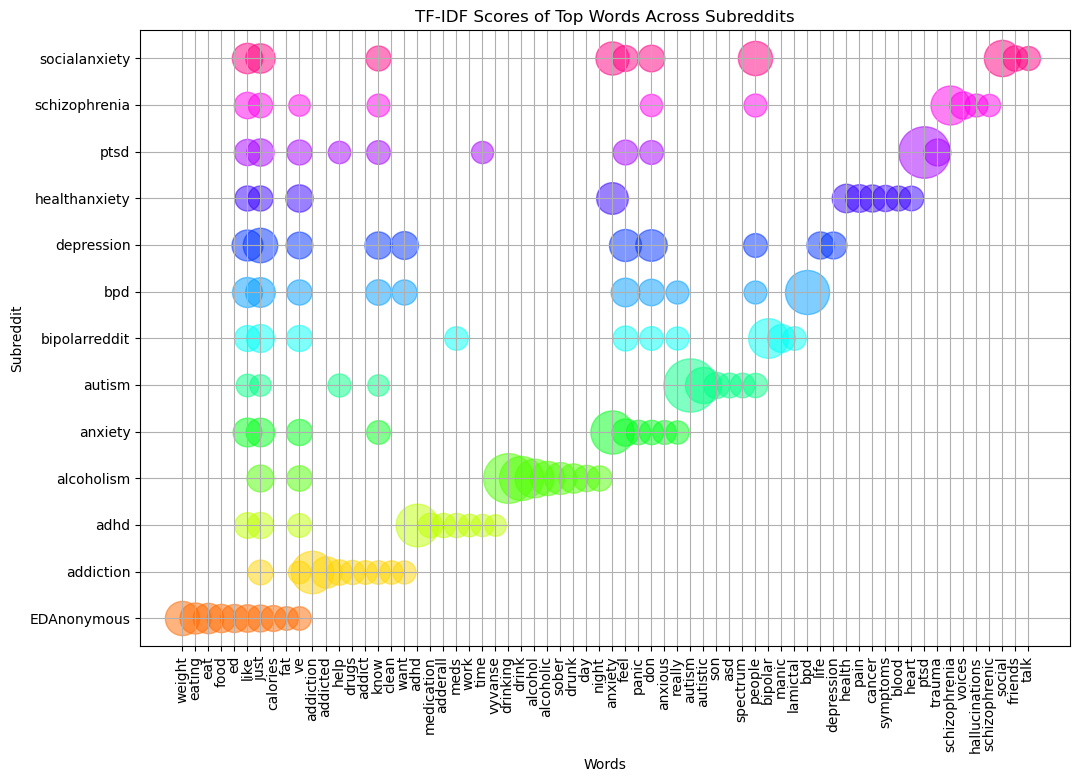

In [23]:
feature_names = tfidf_vect.get_feature_names_out()
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
tfidf_df['subreddit'] = all_labels

# Group by subreddit and calculate mean TF-IDF
grouped_tfidf = tfidf_df.groupby('subreddit').mean()
# For each subreddit, identify the top words by sorting their mean TF-IDF scores in descending order
top_words_per_subreddit = {subreddit: grouped_tfidf.loc[subreddit].sort_values(ascending=False).head(10) for subreddit in grouped_tfidf.index}

# Combine all top words into a single DataFrame with an additional 'subreddit' column
all_words = []
for subreddit, words_scores in top_words_per_subreddit.items():
    temp_df = pd.DataFrame(words_scores).reset_index()
    temp_df.columns = ['Word', 'TF-IDF Score']
    temp_df['Subreddit'] = subreddit
    all_words.append(temp_df)

all_words_df = pd.concat(all_words)

# Map subreddits to colors
color_palette = sns.color_palette("hsv", len(top_words_per_subreddit))
subreddit_to_color = {subreddit: color for subreddit, color in zip(top_words_per_subreddit.keys(), color_palette)}

# Add a color column based on the subreddit
all_words_df['Color'] = all_words_df['Subreddit'].map(subreddit_to_color)

# Plotting
plt.figure(figsize=(12, 8))
for _, row in all_words_df.iterrows():
    plt.scatter(row['Word'], row['Subreddit'], s=row['TF-IDF Score']*10000, color=row['Color'], alpha=0.5)

# Customizations
plt.xlabel('Words')
plt.ylabel('Subreddit')
plt.title('TF-IDF Scores of Top Words Across Subreddits')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# NMF

In [27]:
# Topic Modeling with NMF
nmf = NMF(n_components=5, random_state=42)  # Choose the number of components
X_nmf = nmf.fit_transform(X_tfidf)

c:\miniconda3\envs\ai312\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning:

Maximum number of iterations 200 reached. Increase it to improve convergence.



In [34]:
nmf_features_df = pd.DataFrame(X_nmf, columns=[f'Topic {i}' for i in range(nmf.n_components)])

# Display the DataFrame
nmf_features_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4
0,0.000440,0.022037,0.018794,0.000939,0.010714
1,0.019491,0.005247,0.000000,0.000000,0.015860
2,0.006455,0.000000,0.008852,0.001086,0.036638
3,0.011963,0.002908,0.000000,0.000000,0.040531
4,0.032507,0.002002,0.009317,0.004463,0.020621
...,...,...,...,...,...
50903,0.027564,0.011111,0.010743,0.002373,0.008722
50904,0.000739,0.004721,0.014501,0.000919,0.017565
50905,0.027807,0.033471,0.024703,0.000000,0.000000
50906,0.017104,0.012432,0.000000,0.002580,0.022365


In [36]:
# 'nmf.components_' contains the topic-term associations
topic_term_df = pd.DataFrame(nmf.components_, columns=feature_names, index=[f'Topic {i}' for i in range(nmf.n_components)])

# Display the DataFrame
topic_term_df


,00,10,100,1000,100mg,10mg,10th,11,110,11th,...,youngest,youre,youth,youtube,yr,yrs,zero,zoloft,zombie,zone
Topic 0,0.000000,0.000000,0.011815,0.000000,0.000000,0.000000,0.004276,0.000000,0.000000,0.001235,...,0.001852,0.000000,0.006742,0.013917,0.000579,0.000000,0.019365,0.000000,0.000000,0.007018
Topic 1,0.000000,0.021750,0.019447,0.000000,0.012563,0.024206,0.000332,0.000830,0.002507,0.000000,...,0.000131,0.000496,0.000000,0.000000,0.004428,0.002427,0.000394,0.091204,0.004230,0.021790
Topic 2,0.000000,0.007543,0.017980,0.002449,0.000000,0.000000,0.000000,0.000000,0.000896,0.000000,...,0.000000,0.000000,0.003846,0.010363,0.000000,0.000000,0.010359,0.000000,0.020512,0.004984
Topic 3,0.000084,0.013005,0.004992,0.001167,0.000000,0.000000,0.003182,0.008937,0.003552,0.003967,...,0.004066,0.033641,0.001370,0.006194,0.005134,0.007702,0.008663,0.000000,0.000000,0.004650
Topic 4,0.021253,0.229282,0.068948,0.021033,0.013957,0.047535,0.011472,0.075682,0.007289,0.009246,...,0.007454,0.005399,0.015968,0.047626,0.010523,0.012562,0.047797,0.061491,0.015088,0.022932


# Sentiment Analysis

In [ ]:
# Sentiment Analysis
sentiment_analyzer = SentimentAnalyzer()
X_sentiment = sentiment_analyzer.transform(all_posts)
X_sentiment = np.array(X_sentiment)  # Convert to numpy array for concatenation

In [37]:
# np.savetxt("sentiment_1_13.csv", X_sentiment, delimiter=",")
X_sentiment = np.loadtxt("sentiment_1_13.csv", delimiter=",")
X_sentiment

array([-0.9506, -0.6382,  0.9606, ..., -0.153 ,  0.8776,  0.1289])

# POS Tag

In [ ]:
# Instantiate the fast POS tagger
pos_tagger = FastPOSTagger()

# Apply POS tagging to all posts
pos_features = pos_tagger.transform(all_posts)

# Create a DataFrame where each column is a POS tag and each row corresponds to a post
df_pos = pd.DataFrame(list(pos_features)).fillna(0)  # Fill NaN with 0 to handle posts that might not contain some tags


In [32]:
# df_pos.to_csv('pos_1_13.csv')
df_pos = pd.read_csv('pos_1_13.csv')
df_pos.shape

(50908, 19)

# Combine

In [ ]:
X_combined = hstack([X_tfidf, X_nmf, X_sentiment])
X_combined = hstack([X_combined, df_pos])  # Adding POS features

In [ ]:
X_combined_df = pd.DataFrame(X_combined.toarray())

In [3]:
# X_combined_df.to_csv('combined_df_1_13.csv')
X_combined_df = pd.read_csv('combined_df_1_13.csv')

In [4]:
X_combined_df.shape

(50908, 5025)

In [48]:
from sklearn.decomposition import PCA
X_combined_df = pd.read_csv('combined_df_1_13.csv')
pca = PCA(n_components=0.95)  # Retain 95% of variance
reduced_features = pca.fit_transform(X_combined_df)

In [55]:
reduced_features

array([[-25453.4999985 ],
       [-25452.49999908],
       [-25451.50000223],
       ...,
       [ 25451.49999988],
       [ 25452.49999777],
       [ 25453.49999876]])

In [51]:
print("Number of samples in features:", X_combined_df.shape[1])
print("Number of labels:", len(all_labels))


numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced_features, all_labels, test_size=0.2, random_state=42)
from sklearn.svm import SVC

# Or SVM with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from joblib import dump, load

# Save the model to disk
dump(model, 'svc_model.joblib')

In [ ]:
report_svm = (classification_report(y_test, y_pred, output_dict=True))
df_report = pd.DataFrame(report_svm).transpose()
print(df_report)
df_report.to_csv('classification_report_svm.csv', index=True)

In [15]:
df_report = pd.read_csv('classification_report_svm.csv')

# Meeting the Objectives

In [16]:
# Assuming `nmf` is your trained NMF model and `tfidf_vectorizer` is your TF-IDF vectorizer
feature_names = tfidf_vect.get_feature_names_out()
n_top_words = 10
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}: {' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])}")


Topic 0: don want know just people friends talk life anymore think
Topic 1: anxiety panic social attack anxious attacks help having does symptoms
Topic 2: feel like just feeling feels makes things does way people
Topic 3: im dont ive just fucking know want friends life didnt
Topic 4: ve time work day years job got year going school


In [17]:
dominant_topics = np.argmax(X_nmf, axis=1)
df_topics = pd.DataFrame({
    'Subreddit': all_labels,
    'Dominant_Topic': dominant_topics
})

In [18]:
# Group by subreddit and dominant topic and count occurrences
topic_distribution = df_topics.groupby(['Subreddit', 'Dominant_Topic']).size().unstack(fill_value=0)

# Optionally, normalize the counts to get proportions
topic_distribution_normalized = topic_distribution.div(topic_distribution.sum(axis=1), axis=0)
topic_distribution_normalized

Dominant_Topic,0,1,2,3,4
Subreddit,,,,,
EDAnonymous,0.161515,0.018547,0.224498,0.066847,0.528594
addiction,0.167331,0.041833,0.061753,0.067729,0.661355
adhd,0.063601,0.047945,0.091389,0.038552,0.758513
alcoholism,0.138767,0.046256,0.050661,0.052863,0.711454
anxiety,0.094223,0.547170,0.108316,0.037386,0.212905
autism,0.172767,0.092240,0.111274,0.027818,0.595900
bipolarreddit,0.121483,0.080563,0.136829,0.038363,0.622762
bpd,0.251935,0.036973,0.238607,0.058040,0.414445
depression,0.328388,0.030609,0.210516,0.077440,0.353047


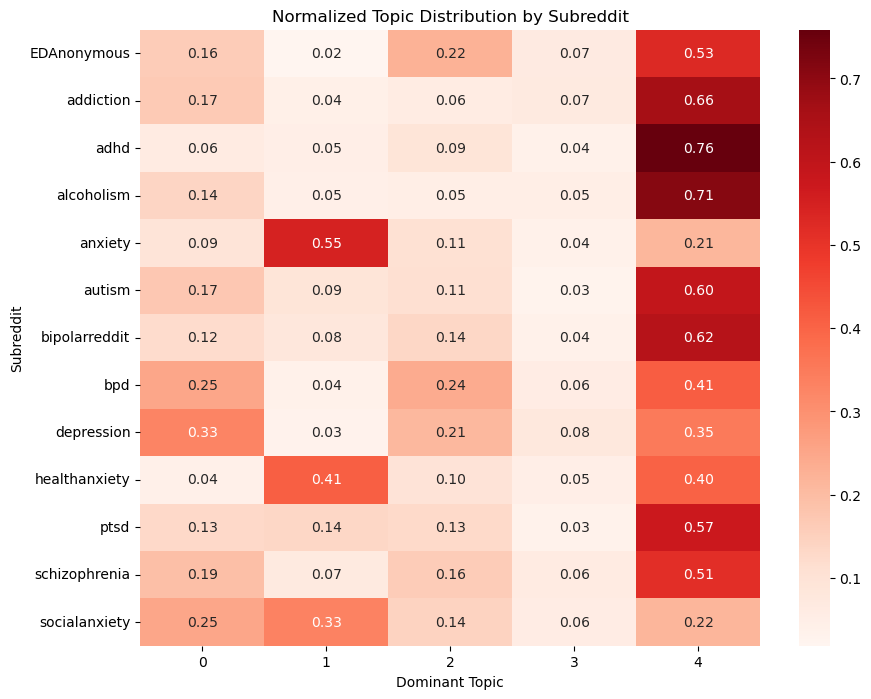

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of topic distribution by subreddit
plt.figure(figsize=(10, 8))
sns.heatmap(topic_distribution_normalized, annot=True, cmap='Reds', fmt=".2f")
plt.title('Normalized Topic Distribution by Subreddit')
plt.ylabel('Subreddit')
plt.xlabel('Dominant Topic')
plt.show()


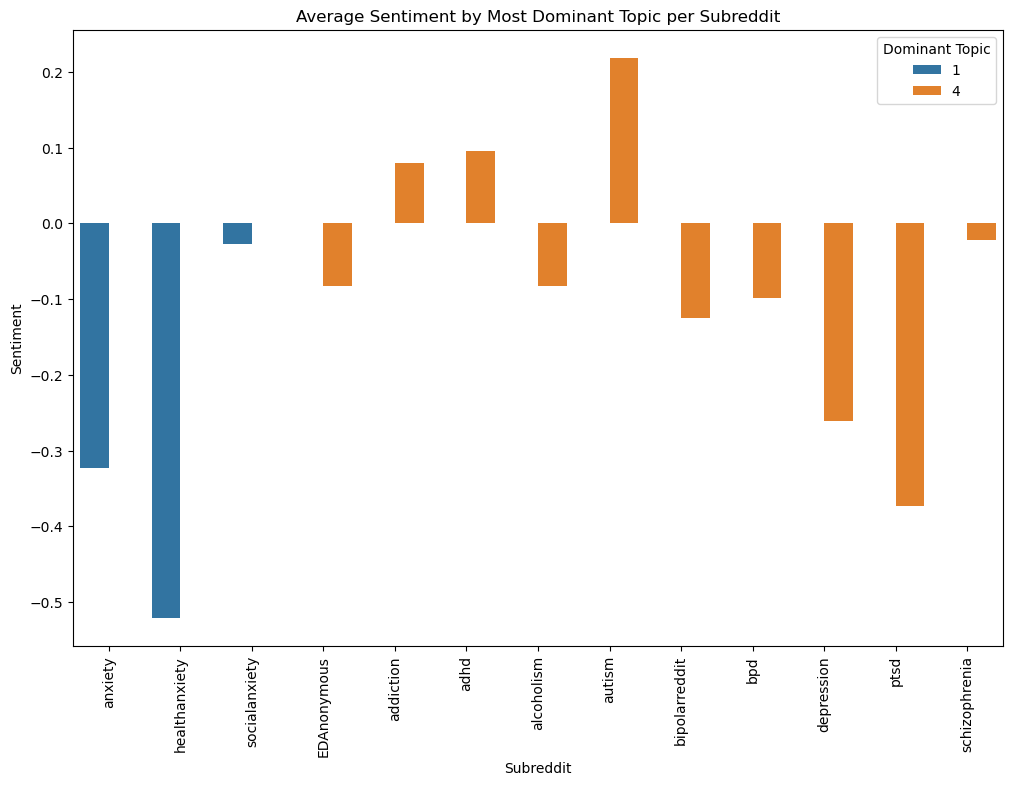

In [20]:
# Given the sentiment scores for each post, calculate the average sentiment for each subreddit
df_sentiment = pd.DataFrame({'Subreddit': all_labels, 'Sentiment': X_sentiment.flatten()})
df_sentiment_avg = df_sentiment.groupby('Subreddit').mean().reset_index()
# Find the dominant topic for each post
dominant_topic = np.argmax(X_nmf, axis=1)  # This gives you the index of the highest topic weight for each post
df_topics = pd.DataFrame({'Subreddit': all_labels, 'Dominant_Topic': dominant_topic})
# Group by subreddit and dominant topic to get the count of each topic in each subreddit
topic_counts = df_topics.groupby(['Subreddit', 'Dominant_Topic']).size().unstack(fill_value=0)
# Find the most dominant topic in each subreddit
most_dominant_topics = topic_counts.idxmax(axis=1).rename('Dominant_Topic')


# Merge this with the average sentiment
cross_analysis = df_sentiment_avg.merge(most_dominant_topics.to_frame(), left_on='Subreddit', right_index=True)
cross_analysis = cross_analysis.sort_values('Dominant_Topic') 
cross_analysis['Dominant_Topic'] = cross_analysis['Dominant_Topic'].astype(str)

# Now, cross_analysis DataFrame will have the average sentiment and the most dominant topic per subreddit
plt.figure(figsize=(12, 8))
sns.barplot(x='Subreddit', y='Sentiment', hue='Dominant_Topic', data=cross_analysis, dodge=True)
plt.xticks(rotation=90)
plt.legend(title='Dominant Topic')
plt.title('Average Sentiment by Most Dominant Topic per Subreddit')
plt.show()

Based on previous output - 

Topic 0: don want know just people friends talk life anymore think

Topic 1: anxiety panic social attack anxious attacks help having does symptoms

Topic 2: feel like just feeling feels makes things does way people

Topic 3: im dont ive just fucking know want friends life didnt

Topic 4: ve time work day years job got year going school

Looking at the chart, two dominant topics are represented, labeled as "1" and "4", which likely correspond to the topics you’ve described. Each bar color corresponds to one of these topics.

Subreddits such as anxiety, healthanxiety, and socialanxiety have a significant negative sentiment and are most strongly associated with Topic 1 (anxiety and panic-related terms).
Subreddits EDAnonymous, addiction, and alcoholism exhibit a mix of sentiment but are mainly associated with Topic 4, which involves aspects of time and possibly the progression or management of conditions, with a context of daily life and routine (work, school).
Other subreddits like autism, bipolarreddit, bpd, depression, ptsd, and schizophrenia also have bars related to Topic 4, showing negative sentiment but not as strongly negative as the anxiety-related subreddits.

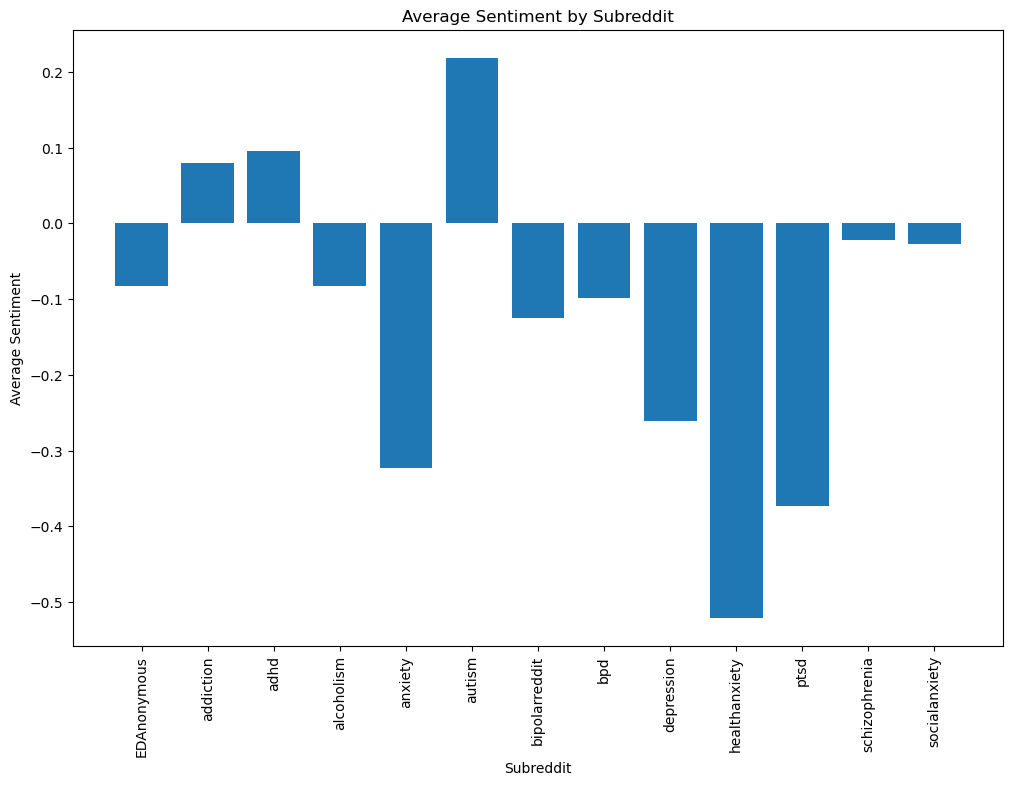

In [21]:
# Assuming `X_sentiment` is your sentiment scores and `labels` are your subreddit labels
df_sentiment = pd.DataFrame({'Subreddit': all_labels, 'Sentiment': X_sentiment.flatten()})
df_sentiment = (df_sentiment.groupby('Subreddit').mean())
plt.figure(figsize=(12, 8))  # You can adjust the figure size as needed
plt.bar(df_sentiment.index, df_sentiment['Sentiment'])
plt.xlabel('Subreddit')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Subreddit')
plt.xticks(rotation=90)  # Rotates the labels on the x-axis to prevent overlap
plt.show()

In [30]:
df_pos = df_pos.drop(columns=['Unnamed: 0'])

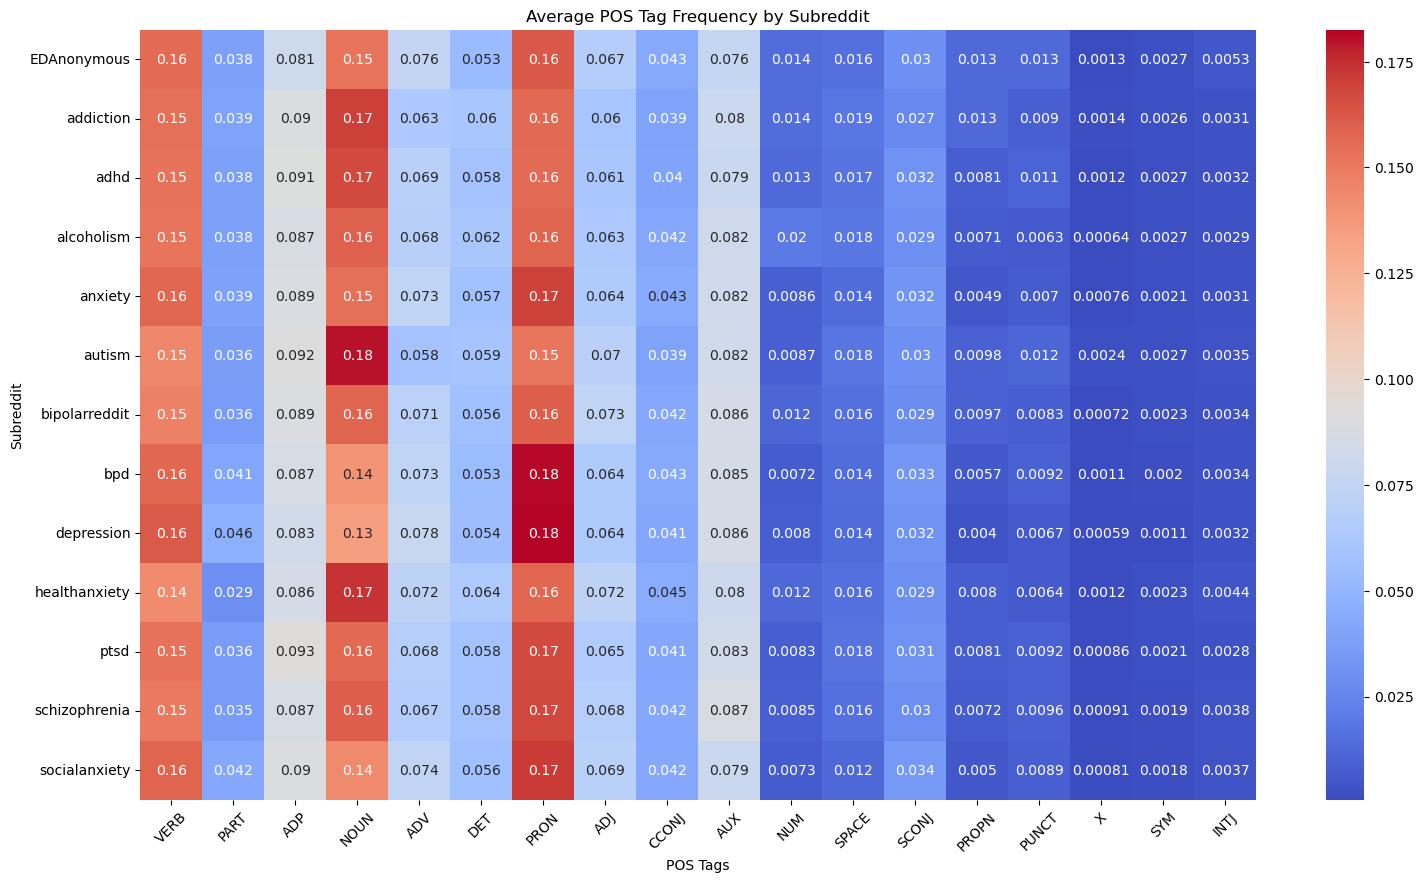

In [31]:
from scipy.stats import chi2_contingency
df_pos['Subreddit'] = all_labels  # Add the subreddit labels to the DataFrame

# Calculate the average POS tag frequency per subreddit
df_pos_avg = df_pos.groupby('Subreddit').mean()
# Plot the average POS tag frequencies for each subreddit
plt.figure(figsize=(18, 10))  # Adjust the size as needed
sns.heatmap(df_pos_avg, cmap='coolwarm', annot=True)
plt.title('Average POS Tag Frequency by Subreddit')
plt.xlabel('POS Tags')
plt.ylabel('Subreddit')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Each row represents a subreddit, and each column represents a POS tag category like verbs (VERB), particles (PART), adpositions (ADP), and so forth.

Pronouns (PRON) tend to have higher frequencies across almost all subreddits, as indicated by the consistent red shading in that column. Conversely, conjunctions (CONJ) and interjections (INTJ) appear less frequently, as shown by the blue shading in those columns.

For example, the subreddit for bipolarreddit has a notably high frequency of adjectives (ADJ), which could indicate a descriptive nature in the discussions there.

More pronoun usage for Depression and BPD

More noun usage for healthanxiety and low PART usage too.



# To see how BERT Embeddings are being created, please refer to bert_create_embeddings.ipynb

BERT embeddings were created on colab and saved. that saved file is being used below.

In [38]:
embeddings = np.loadtxt('D:\Cornell Academics\Spring\ML for Health\embeddings_mentalbert_32.txt', delimiter =',')

<>:1: SyntaxWarning:

invalid escape sequence '\C'

<>:1: SyntaxWarning:

invalid escape sequence '\C'

C:\Users\Khojasteh Mirza\AppData\Local\Temp\ipykernel_17568\827378118.py:1: SyntaxWarning:

invalid escape sequence '\C'



In [39]:
embeddings.shape

(50908, 768)

In [10]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(embeddings, all_labels, test_size=0.2, random_state=42)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Print classification report to evaluate the model
print(classification_report(y_test, y_pred))


c:\miniconda3\envs\ai312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\miniconda3\envs\ai312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\miniconda3\envs\ai312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

  EDAnonymous       0.00      0.00      0.00       555
    addiction       0.40      0.02      0.04        98
         adhd       0.62      0.20      0.31      1032
   alcoholism       0.00      0.00      0.00        94
      anxiety       0.45      0.45      0.45      1722
       autism       0.20      0.01      0.01       143
bipolarreddit       0.17      0.01      0.01       143
          bpd       0.33      0.19      0.24       442
   depression       0.57      0.92      0.70      4874
healthanxiety       0.00      0.00      0.00       155
         ptsd       0.00      0.00      0.00       151
schizophrenia       0.00      0.00      0.00       227
socialanxiety       0.00      0.00      0.00       546

     accuracy                           0.54     10182
    macro avg       0.21      0.14      0.14     10182
 weighted avg       0.43      0.54      0.45     10182



In [11]:
from joblib import dump, load

# Save the model to disk
dump(model, 'mental_bert32_svc_model.joblib')

['mental_bert32_svc_model.joblib']

In [16]:
bert32_report_svm = (classification_report(y_test, y_pred, output_dict=True))
df_bert32_report_svm = pd.DataFrame(bert32_report_svm).transpose()
df_bert32_report_svm.to_csv('df_bert32_report_svm.csv', index=True)

c:\miniconda3\envs\ai312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\miniconda3\envs\ai312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\miniconda3\envs\ai312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparing the manual apprach v/s MentalBERT with 128 token length

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_bert32_report_svm = pd.read_csv('df_bert32_report_svm.csv')
df_bert32_report_svm.drop(columns=['support'], inplace=True)
df_bert32_report_svm.rename(columns={'Unnamed: 0':'Subreddit'}, inplace=True)
df_bert32_report_svm = df_bert32_report_svm.set_index('Subreddit')

df_report_svm = pd.read_csv('classification_report_svm.csv')
df_report_svm.drop(columns=['support'], inplace=True)
df_report_svm.rename(columns={'Unnamed: 0':'Subreddit'}, inplace=True)
df_report_svm = df_report_svm.set_index('Subreddit')


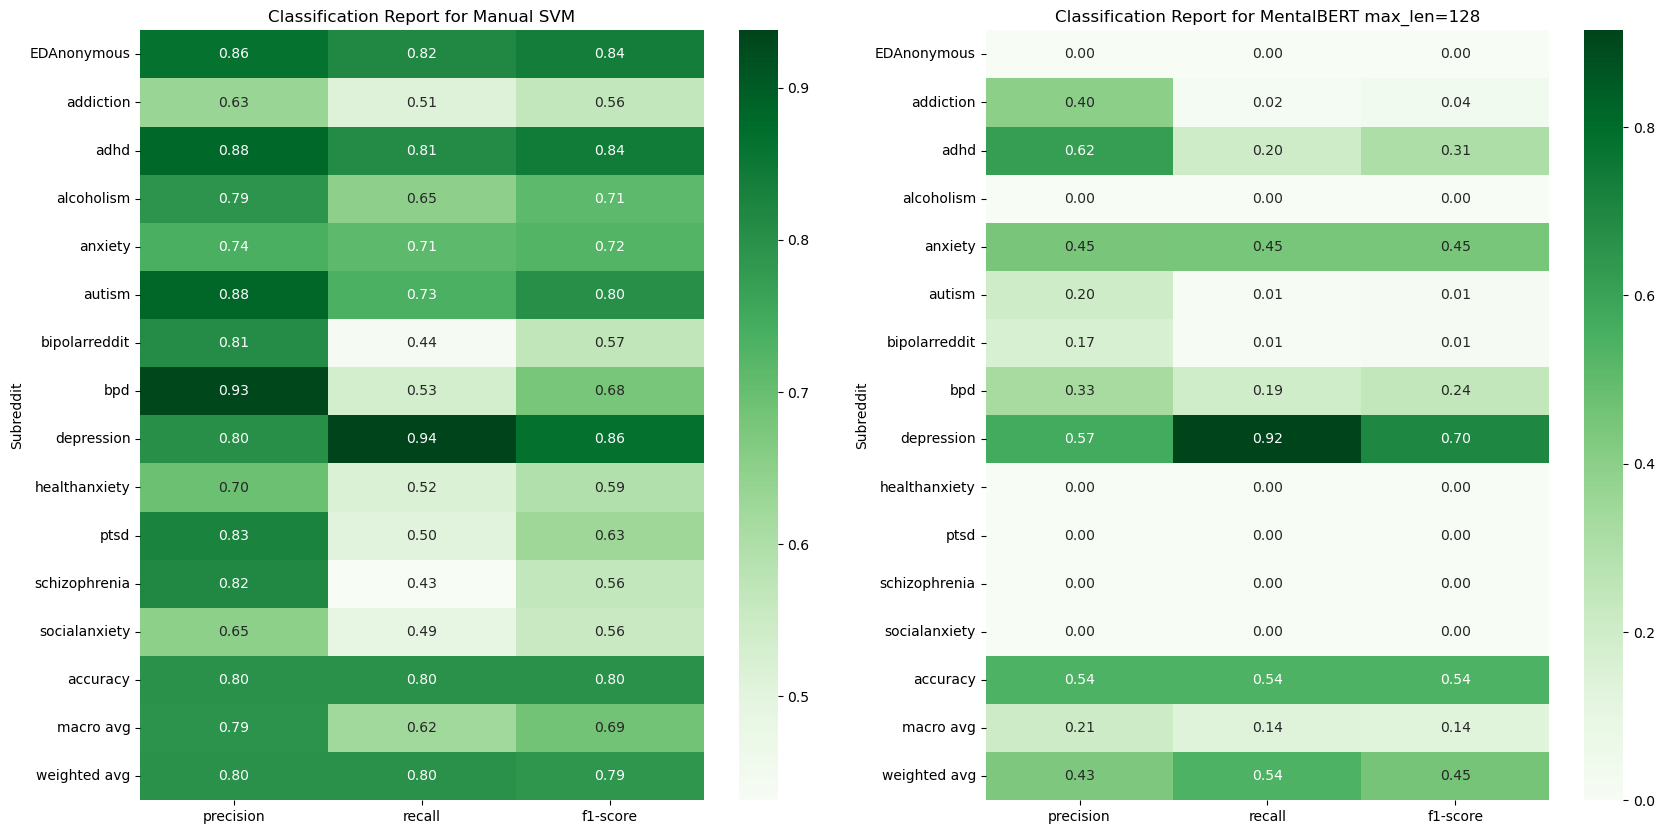

In [3]:
# Now 'df' contains only numeric values, with the subreddits as row label
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.heatmap(df_report_svm, ax=axs[0], annot=True, cmap='Greens', fmt=".2f")
axs[0].set_title("Classification Report for Manual SVM")

sns.heatmap(df_bert32_report_svm, ax=axs[1], annot=True, cmap='Greens', fmt=".2f")
axs[1].set_title("Classification Report for MentalBERT max_len=128")

plt.show()